In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r'D:\Be Eternal\MyProject\Fraud_detection\Fraud_detection.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#amount--->amount of the transaction in local currency
#nameOrig--->customer who started the transaction
#oldbalanceOrg--->initial balance before the transaction
#newbalanceOrig--->customer's balance after the transaction.
#nameDest--->recipient ID of the transaction.
#oldbalanceDest--->initial recipient balance before the transaction.
#newbalanceDest--->recipient's balance after the transaction.	
#isFraud--->identifies a fraudulent transaction (1) and non fraudulent (0)
#isFlaggedFraud--->The business model aims to control massive transfers from one account to another 
#and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
x=data.drop(["isFraud", "isFlaggedFraud"],axis=1)
y=data["isFraud"]
count_class=y.value_counts()
count_class

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
x.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79


In [9]:
smote=SMOTE(sampling_strategy='minority')
x, y=smote.fit_resample(x.drop(['type','nameOrig','nameDest'], axis=1), y)
y.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [10]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [11]:
data['label_type'] = data['type'].map({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})

In [12]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,label_type
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,2
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,4
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,4


In [13]:
data.value_counts().sum()

np.int64(6362620)

In [14]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
label_type        0
dtype: int64

In [15]:
y=data["isFraud"]
smote=SMOTE(sampling_strategy='minority')
x, y=smote.fit_resample(data.drop(['type','nameOrig','nameDest', 'isFraud'], axis=1), y)
y.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=pd.array(['0', '1'], dtype='<U10')))

Accuracy: 0.998536055485897

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [17]:
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9991


In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9980


In [19]:
from sklearn.model_selection import cross_val_score
recall_scores = cross_val_score(model, x, y, cv=5, scoring='recall')
print(f"Cross-validated recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}")

Cross-validated recall: 0.9993 ± 0.0001


In [20]:
print(pd.Series(y_test).value_counts(normalize=True))

isFraud
1    0.500018
0    0.499982
Name: proportion, dtype: float64


In [21]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
# F1-Score (harmonic mean of precision and recall)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Precision: 0.9980
F1-Score: 0.9985
Confusion Matrix:
[[1268261    2576]
 [   1145 1269781]]


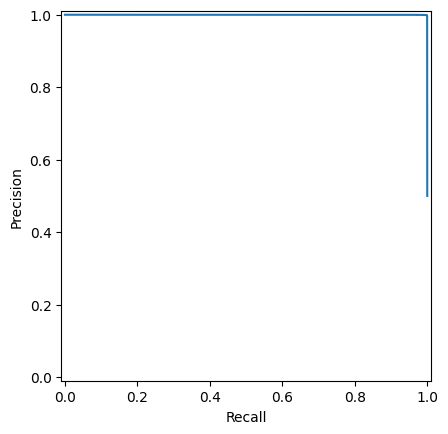

In [22]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
import matplotlib.pyplot as plt
plt.show()